In [1]:
#Neural Network

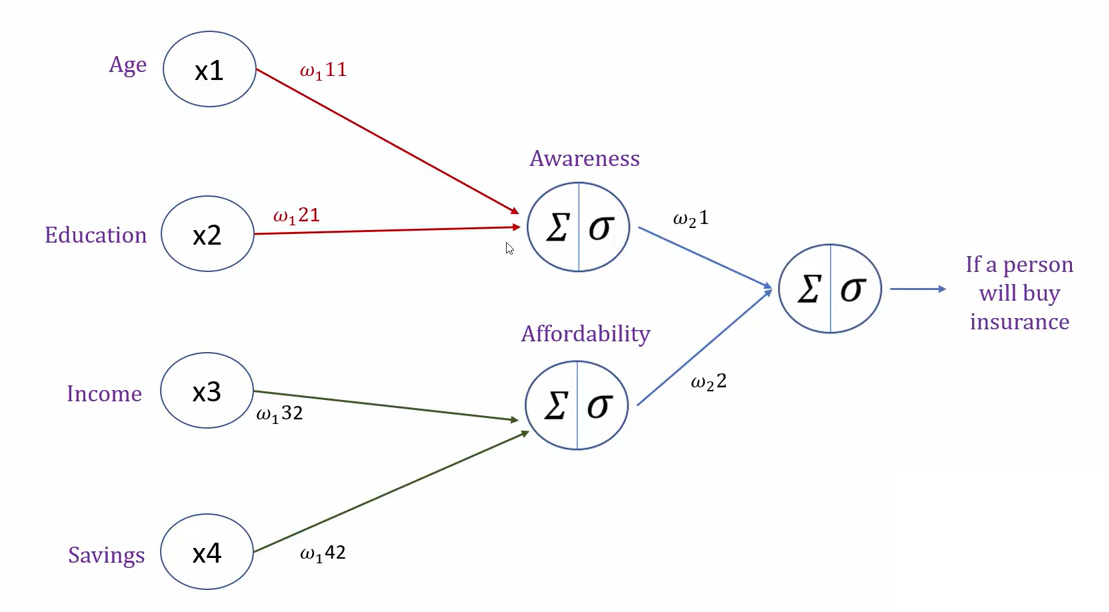

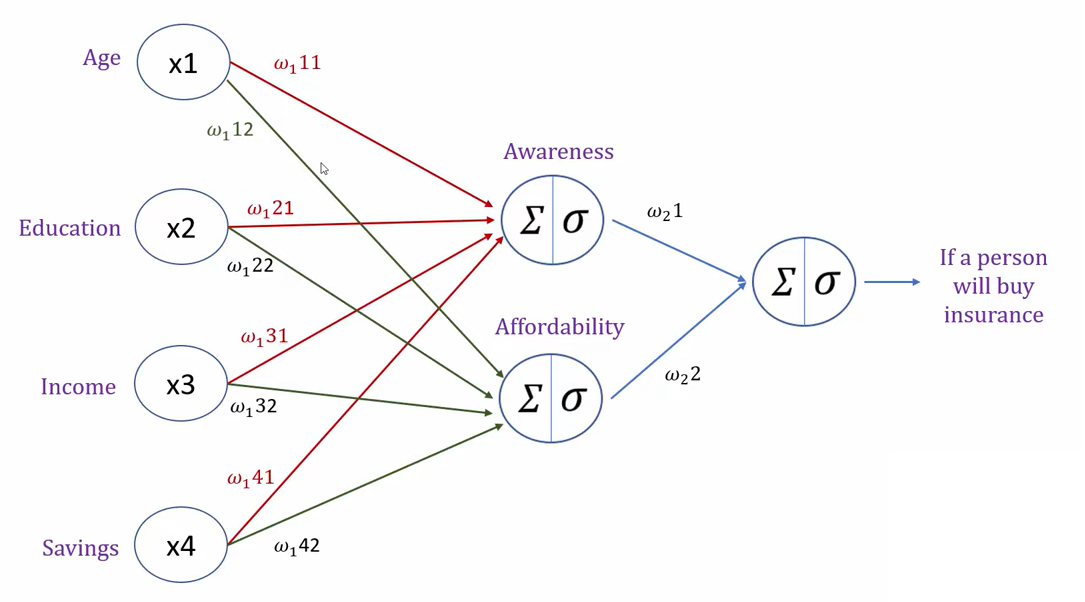

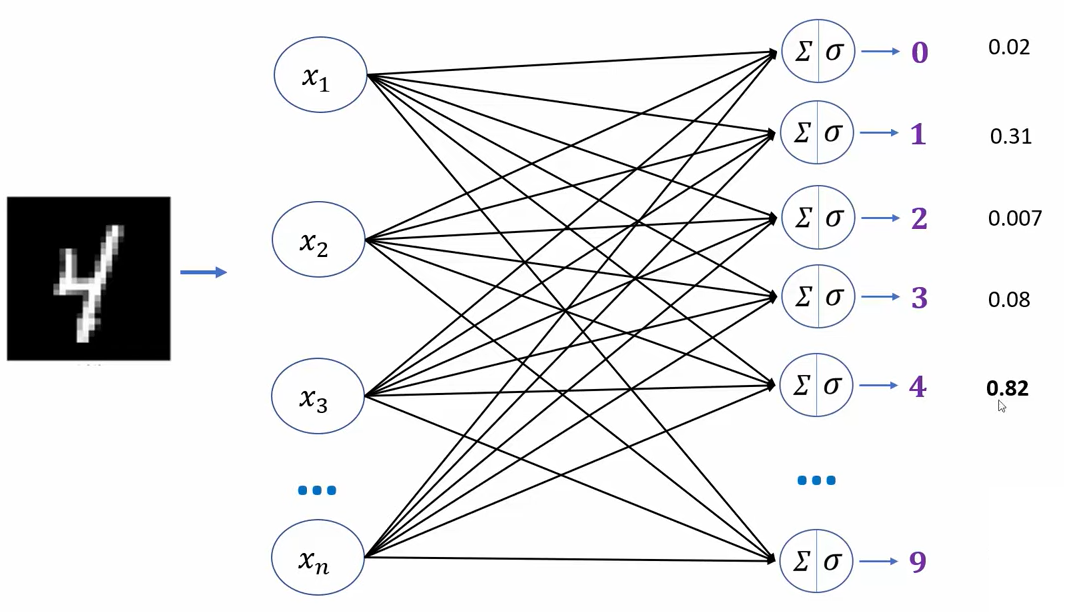

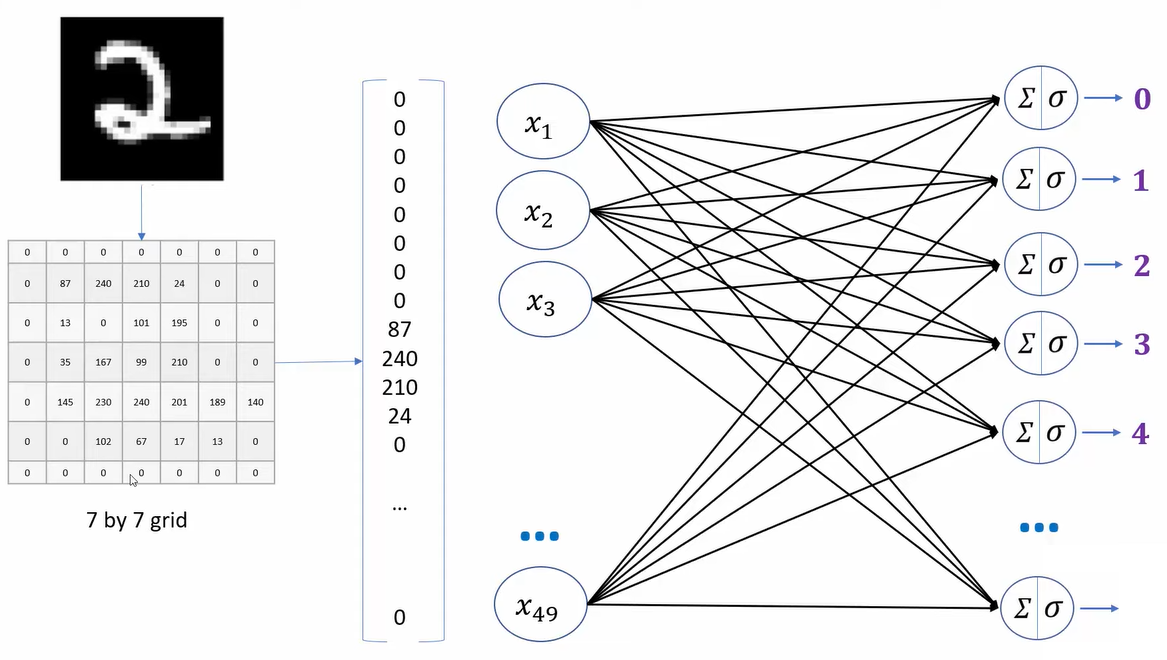

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow import keras

In [5]:
#tensorflow is from google
#pytorch is from meta
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#mnist are the handwritten digits

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
#X_train[0]

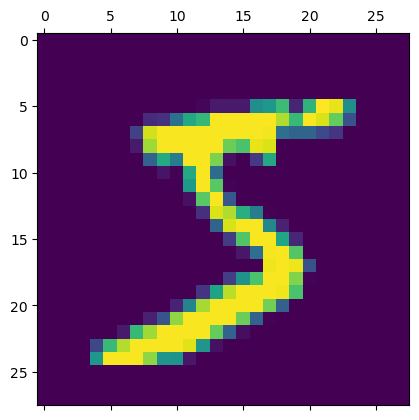

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
#(60000, 28, 28) to (60000, 784) #NOT SCALING
X_train_flatten = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2]) 

In [15]:
print(X_train.shape)
print(X_train_flatten.shape)

(60000, 28, 28)
(60000, 784)


In [16]:
X_test_flatten = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]) 

In [17]:
#Simple NN 
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(X_train_flatten.shape[1],), activation = 'sigmoid')
    # X_train_Flatten.shape[1] = 784
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 378us/step - loss: 9.5123 - accuracy: 0.8416
Epoch 2/5
1875/1875 [==============================] - 1s 312us/step - loss: 6.1011 - accuracy: 0.8784
Epoch 3/5
1875/1875 [==============================] - 1s 311us/step - loss: 5.7149 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 1s 311us/step - loss: 5.4764 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 1s 311us/step - loss: 5.4175 - accuracy: 0.8863


In [19]:
#(60000, 28, 28) to (60000, 784) #SCALING
X_train_flatten = X_train.reshape(len(X_train/255), X_train.shape[1] * X_train.shape[2]) 
X_test_flatten = X_test.reshape(len(X_test/255), X_test.shape[1] * X_test.shape[2])

In [20]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 317us/step - loss: 5.3032 - accuracy: 0.8876
Epoch 2/5
1875/1875 [==============================] - 1s 318us/step - loss: 5.2497 - accuracy: 0.8885
Epoch 3/5
1875/1875 [==============================] - 1s 314us/step - loss: 5.2356 - accuracy: 0.8895
Epoch 4/5
1875/1875 [==============================] - 1s 326us/step - loss: 5.1815 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 1s 324us/step - loss: 5.2128 - accuracy: 0.8902


In [22]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 280us/step - loss: 5.6746 - accuracy: 0.8985


[5.674643039703369, 0.8985000252723694]

In [52]:
def train_and_evaluate(activation_function, X_train, X_test):
    model=keras.Sequential([
        keras.layers.Dense(10, input_shape=(784,), activation=activation_function)
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    # Train the model
    model.fit(X_train, y_train, epochs=1) #just keep epochs 1 to make execution faster

    #Evaluate the model
    loss,accuracy=model.evaluate(X_test, y_test)
    print(f"{activation_function} completed")
    return accuracy

In [54]:
# Train and evaluate the model with different activation function
activate_functions=['sigmoid', 'ReLU', 'tanh', 'linear', 'softmax']
accuracies=[train_and_evaluate(func, X_train_flatten, X_test_flatten) for func in activate_functions]

#print the accuracies per activation function
for func, acc in zip(activate_functions, accuracies):
    print(f"{func} - Test accuracy: {acc}")

313/313 [==============================] - 0s 280us/step - loss: 5.7304 - accuracy: 0.8925
sigmoid completed
313/313 [==============================] - 0s 284us/step - loss: 2.3187 - accuracy: 0.0977
ReLU completed
313/313 [==============================] - 0s 284us/step - loss: 2.3040 - accuracy: 0.0980
tanh completed
313/313 [==============================] - 0s 283us/step - loss: 2.3091 - accuracy: 0.1506
linear completed
313/313 [==============================] - 0s 284us/step - loss: 5.8656 - accuracy: 0.8874
softmax completed
sigmoid - Test accuracy: 0.8924999833106995
ReLU - Test accuracy: 0.09769999980926514
tanh - Test accuracy: 0.09799999743700027
linear - Test accuracy: 0.15060000121593475
softmax - Test accuracy: 0.8873999714851379


In [57]:
#Deep Learning 
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flatten.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(64, activation = 'softmax'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)
model.evaluate(X_test_flatten, y_test)

Epoch 1/5
1875/1875 [==============================] - 1s 639us/step - loss: 1.6729 - accuracy: 0.4200
Epoch 2/5
1875/1875 [==============================] - 1s 632us/step - loss: 1.2829 - accuracy: 0.4743
Epoch 3/5
1875/1875 [==============================] - 1s 634us/step - loss: 1.1576 - accuracy: 0.5250
Epoch 4/5
1875/1875 [==============================] - 1s 628us/step - loss: 1.0797 - accuracy: 0.5712
Epoch 5/5
313/313 [==============================] - 0s 381us/step - loss: 0.9494 - accuracy: 0.6828


[0.9494052529335022, 0.6827999949455261]

In [58]:
#Deep Learning 
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flatten.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)
model.evaluate(X_test_flatten, y_test)

Epoch 1/5
1875/1875 [==============================] - 1s 563us/step - loss: 0.5265 - accuracy: 0.8570
Epoch 2/5
1875/1875 [==============================] - 1s 560us/step - loss: 0.3459 - accuracy: 0.8992
Epoch 3/5
1875/1875 [==============================] - 1s 561us/step - loss: 0.3302 - accuracy: 0.9027
Epoch 4/5
1875/1875 [==============================] - 1s 568us/step - loss: 0.3081 - accuracy: 0.9080
Epoch 5/5
313/313 [==============================] - 0s 368us/step - loss: 0.2681 - accuracy: 0.9179


[0.26811426877975464, 0.917900025844574]

In [59]:
#Deep Learning 
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flatten.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(64, activation = 'softmax'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)
model.evaluate(X_test_flatten, y_test)

Epoch 1/5
1875/1875 [==============================] - 1s 646us/step - loss: 1.4097 - accuracy: 0.6660
Epoch 2/5
1875/1875 [==============================] - 1s 638us/step - loss: 0.8185 - accuracy: 0.7082
Epoch 3/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.7028 - accuracy: 0.7471
Epoch 4/5
1875/1875 [==============================] - 1s 633us/step - loss: 0.6448 - accuracy: 0.7792
Epoch 5/5
313/313 [==============================] - 0s 382us/step - loss: 0.5810 - accuracy: 0.8218


[0.5809676051139832, 0.8217999935150146]